In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from random import randint
import collections

In [2]:
def PopulateBoard(n,m,num_mines,initclickx=-1,initclicky=-1,radiussafe = 3):
    Board = np.zeros((n+2,m+2))
    if initclickx == -1:
        initclickx=randint(1, n)
        initclicky=randint(1, m)
    x=randint(1, n)
    y=randint(1, m)
    for i in range(0,num_mines):
        while Board[x][y] == -1 or initclickx+radiussafe>x>initclickx-radiussafe and initclicky+radiussafe>y>initclicky-radiussafe:
            x=randint(1, n)
            y=randint(1, m)
        Board[x][y]=-1
    for i in range(1,len(Board)-1):
        for j in range(1,len(Board.T)-1):
            count=0;
            for ii in range(-1,2):
                for jj in range(-1,2):
                    if -1.0 == Board[i+ii,j+jj]:
                        count+=1
            if Board[i][j] != -1:
                Board[i][j]=count

    
    return (Board[1:n+1,1:m+1])

In [3]:
def BoardtoRGB(Board):
    BoardRGB=np.zeros((len(Board),len(Board.T),3))
    for i in range(0,(len(Board))):
        for j in range(0,(len(Board.T))):
            if Board[i][j] == -2:
                BoardRGB[i][j]=[0.2,0,8]
            if Board[i][j] == -1:
                BoardRGB[i][j]=[0,0,0]
            if Board[i][j] == 0:
                BoardRGB[i][j]=[1,1,1]
            if Board[i][j] > 0:
                BoardRGB[i][j]=[0.8,1 - (Board[i][j]-1)/8.0,0.4]
            if Board[i][j] == 0.7:
                BoardRGB[i][j]=[0.8,0.2,0.2]
    return BoardRGB

In [4]:
def SolveBoard(Mask,Board,clickx,clicky):
    Mask = 10*np.ones((n,m))

In [5]:
def CalcProbClick(Mask,MinesTotal = 10):
    MaskPadded=np.zeros((len(Mask)+2,len(Mask.T)+2))
    MaskPadded[1:len(Mask)+1,1:len(Mask.T)+1]=Mask
    MaskProbMine=np.ones((len(Mask),len(Mask.T)))
    temp = 0
    
    for i in range(0,len(Mask)):
        for j in range(0,len(Mask.T)):
            
            if Mask[i][j] == -2:
                temp = 0
                
                for ii in range(0,3):
                    for jj in range(0,3):
                        
                        if MaskPadded[i+ii][j+jj] >= 1:
                            temp+=0.001
                            tempM=MaskPadded[i+ii][j+jj]
                            tempC=0
                            
                            for mi in range(0,3):
                                for mj in range(0,3):
                                    
                                    if MaskPadded[i+ii+mi-1][j+jj+mj-1] == 0.7:
                                        tempM-=1
                                    if MaskPadded[i+ii+mi-1][j+jj+mj-1] == -2:
                                        tempC+=1
                        else:
                            tempM=0
                            tempC=1
                        
                        if tempM<0:
                            tempM=0
                        temp+=tempM/tempC
                
            MaskProbMine[i][j] = temp
    
    FlagCount = (Mask == 0.7).sum()
    CellCount = (Mask == -2).sum()
    for i in range(0,len(Mask)):
        for j in range(0,len(Mask.T)):
            if Mask[i][j] != -2:
                MaskProbMine[i][j] = 9
            elif MaskProbMine[i][j] == 0:
                MaskProbMine[i][j] = float(MinesTotal-FlagCount)/CellCount
    
    imgplot = plt.imshow(MaskProbMine.T,cmap='hot',interpolation='none')
    plt.show()
    
    return MaskProbMine
                                    
                            
                        
                        

In [6]:
def ClickFlag(Mask):
    MaskPadded=np.zeros((len(Mask)+2,len(Mask.T)+2))
    MaskPadded[1:len(Mask)+1,1:len(Mask.T)+1]=Mask
    MaskNeighbourCount=np.zeros((len(Mask),len(Mask.T)))
    temp = 0
    
    for i in range(0,len(Mask)):
        for j in range(0,len(Mask.T)):
            
            temp=0
            for ii in range(0,3):
                for jj in range(0,3):
                    if MaskPadded[i+ii][j+jj] == -2 or MaskPadded[i+ii][j+jj] == 0.7:
                        if not ii==jj==1:
                            temp+=1
                        
            MaskNeighbourCount[i][j]=temp
    
    MaskPaddedNeighbours=np.zeros((len(Mask)+2,len(Mask.T)+2))
    MaskPaddedNeighbours[1:len(Mask)+1,1:len(Mask.T)+1]=MaskNeighbourCount  
    
    MaskUpdate=np.zeros((len(Mask),len(Mask.T)))
    
    for i in range(0,len(Mask)):
        for j in range(0,len(Mask.T)):
            if Mask[i][j] == MaskNeighbourCount[i][j] and Mask[i][j]>0:
                for ii in range(0,3):
                    for jj in range(0,3):
                        if MaskPadded[i+ii][j+jj] == -2:
                            MaskPadded[i+ii][j+jj]=0.7
                
                                      
    return MaskPadded[1:len(Mask)+1,1:len(Mask.T)+1]
    
    

In [7]:
def ClickSafe(Mask,Board):
    MaskPadded=np.zeros((len(Mask)+2,len(Mask.T)+2))
    MaskPadded[1:len(Mask)+1,1:len(Mask.T)+1]=Mask
    MaskSatisfied=np.zeros((len(Mask),len(Mask.T)))
    
    for i in range(0,len(Mask)):
        for j in range(0,len(Mask.T)):
            
            temp = 0
            for ii in range(0,3):
                for jj in range(0,3):
                    if MaskPadded[i+ii][j+jj] == 0.7 and not ii==jj==1:
                        temp+=1
            
            if temp == Mask[i][j]  and Mask[i][j] != 0:
                MaskSatisfied[i][j]=1
    
    for i in range(0,len(Mask)):
        for j in range(0,len(Mask.T)):
            
            if MaskSatisfied[i][j] == 1:
                for ii in range(0,3):
                    for jj in range(0,3):
                        if MaskPadded[i+ii][j+jj] == -2:
                            FloodFill(Mask,Board,i+ii-1,j+jj-1,0,True)
                            
    
    return Mask
    

In [8]:
def MaskClick(PMask,Mask):
    clickx=-1
    clicky=-1
    minyet=10
    
    for i in range(0,len(Mask)):
        for j in range(0,len(Mask.T)):
            if minyet >= PMask[i][j]:
                clickx=i
                clicky=j
                minyet = PMask[i][j]
    
    return clickx,clicky


In [9]:
def BombCheck(Mask,Board,x,y,fill,d=True,empty=0.0):
    if Board[x][y] == -1:
        print "KABOOM"
        return False
    else:
        FloodFill(Mask,Board,x,y,fill,d,empty)
        return True


In [10]:
def FloodFill(Mask,Board,x,y,fill,d=True,empty=0.0):
    if Board[x][y] > empty:
        Mask[x][y] = Board[x][y]
    if Board[x][y] == empty and Mask[x][y] == -2:     
        Mask[x][y] = empty  
        if x > 0:
            FloodFill(Mask,Board,x-1,y,fill,d)
        if x < len(Board)-1:
            FloodFill(Mask,Board,x+1,y,fill,d)
        if y > 0:
            FloodFill(Mask,Board,x,y-1,fill,d)
        if y < len(Board.T)-1:
            FloodFill(Mask,Board,x,y+1,fill,d)

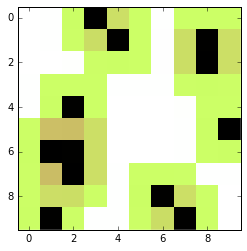

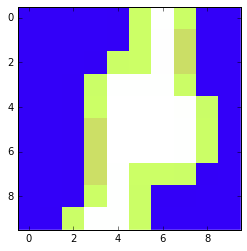

F


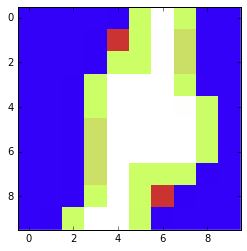

C


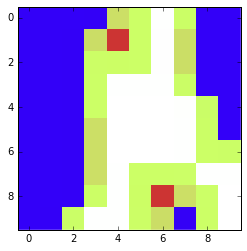

F


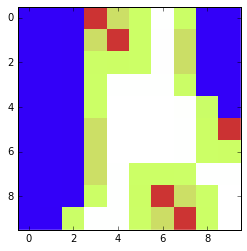

C


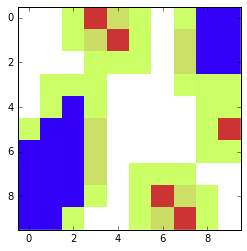

F


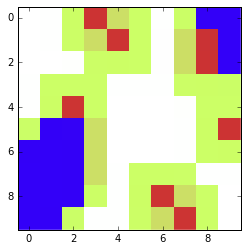

C


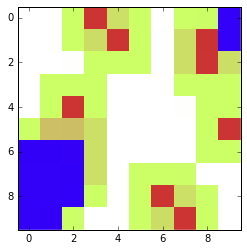

F


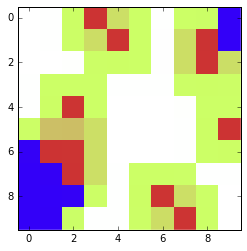

C


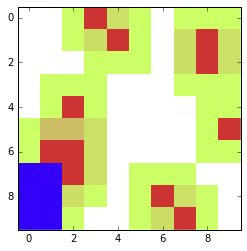

F


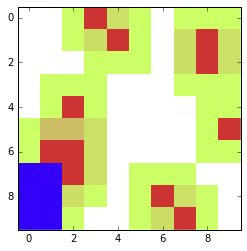

C


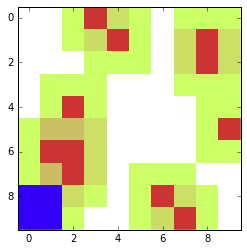

F


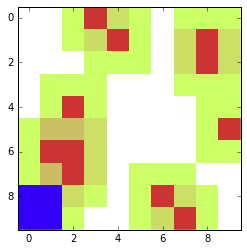

C


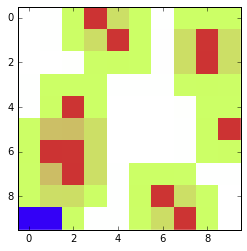

F


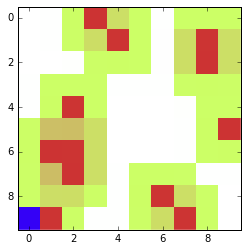

C


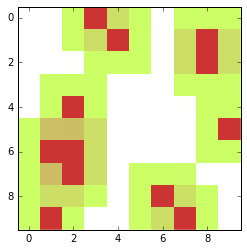

YOU WIN


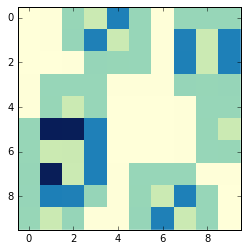

In [13]:
n=10
m=10
mines=12
clickx=n//2
clicky=m//2
Board = PopulateBoard(n,m,mines,clickx+1,clicky+1)

Mask = np.ones((n,m))*-2
MaskProbability = np.zeros((n,m))

imgplot = plt.imshow(BoardtoRGB(Board.T),interpolation='none')
plt.show()

FloodFill(Mask,Board,clickx,clicky,0,True)

imgplot = plt.imshow(BoardtoRGB(Mask.T),interpolation='none')
plt.show()

deathflag = True

while deathflag:
    
    
    MaskSave=Mask
    
    print 'F'
    Mask = ClickFlag(Mask)
    imgplot = plt.imshow(BoardtoRGB(Mask.T),interpolation='none')
    plt.show()
    print 'C'
    Mask = ClickSafe(Mask,Board)
    imgplot = plt.imshow(BoardtoRGB(Mask.T),interpolation='none')
    plt.show()
    
    if np.array_equal(Mask,MaskSave):
        PMask=CalcProbClick(Mask,mines)
        clickx,clicky=MaskClick(PMask,Mask)
        print clickx,clicky
        deathflag = BombCheck(Mask,Board,clickx,clicky,0,deathflag)
      
    
    if -2 not in Mask:
        print "YOU WIN"
        imgplot = plt.imshow(Mask.T,interpolation='none',cmap='YlGnBu')
        plt.show()
        deathflag=False

    
    
    
    
        
        

